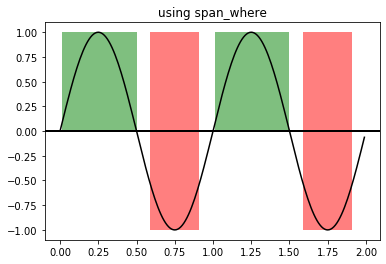

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections


t = np.arange(0, 2, .01)
s1 = np.sin(2*np.pi*t)
s2 = 1.2*np.sin(4*np.pi*t)



fig, ax = plt.subplots()
ax.set_title('using span_where')
ax.plot(t, s1, color='black')
ax.axhline(0, color='black', lw=2)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=0, ymax=1, where=s1 > 0, facecolor='green', alpha=0.5)

ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=-1, ymax=1, where=s1 < -.5, facecolor='r', alpha=0.5)

ax.add_collection(collection)


plt.show()

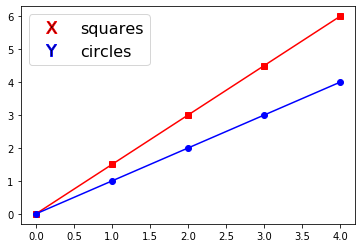

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots()

new_legends = ["X", "Y"]
markers = ['s', 'o']
colors = ['r', 'b']

x = np.arange(5)
plt.plot(x, 1.5*x, marker=markers[0], color=colors[0], label='squares')
plt.plot(x, x, marker=markers[1], color=colors[1], label='circles')

_, labels = ax.get_legend_handles_labels()

def dupe_legend(label, color):
    line = Line2D([0], [0], linestyle='none', mfc='black',
                mec=color, marker=r'$\mathregular{{{}}}$'.format(label))
    return line

duplicates = [dupe_legend(leg, color) for leg, color in zip(new_legends, colors)]
ax.legend(duplicates, labels, numpoints=1, markerscale=2, fontsize=16)
plt.show()

In [7]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 10, 1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=np.arange(0, 10, 0.01),
            y=np.sin(step * np.arange(0, 10, 0.01))))

# Make 10th trace visible
fig.data[1].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)
    arg=["visible", [False] * len(fig.data)]
sliders = [dict(
    active=10,   #默认值
    currentvalue={"prefix": "Frequency:"},    #滑动条显示的名称；
    pad={"t": 10},    # 调节滑动条的位置,单位像素；
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

1

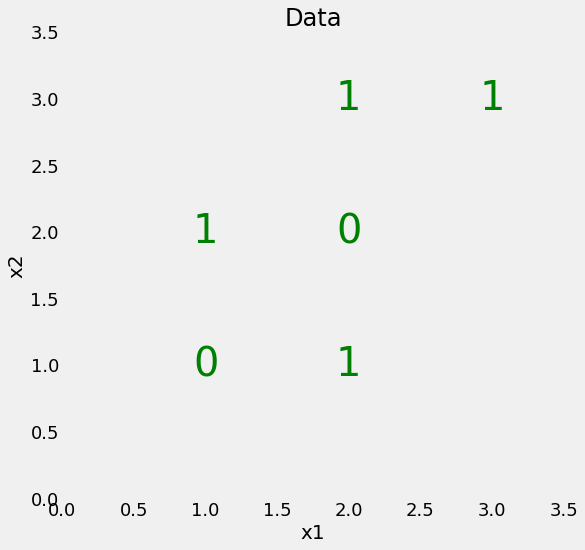

In [1]:
import numpy as np
import pandas as pd
RSEED = 50

X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])

y = np.array([0, 1, 1, 1, 0, 1])

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.figure(figsize = (8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'g',
             ha='center', va='center')
    
# Plot formatting
plt.grid(None);
plt.xlim((0, 3.5));
plt.ylim((0, 3.5));
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Data', size = 24)

from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)

from sklearn.tree import export_graphviz

# Export as dot
export_graphviz(tree, 'tree.dot', rounded = True, 
                feature_names = ['x1', 'x2'], 
                class_names = ['0', '1'], filled = True)
import subprocess
from subprocess import call

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])


In [3]:
from graphviz import Digraph

ModuleNotFoundError: No module named 'graphviz'

In [2]:
from IPython.display import Image
Image('tree.png')

FileNotFoundError: No such file or directory: 'tree.png'

FileNotFoundError: No such file or directory: 'tree.png'

<IPython.core.display.Image object>